In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 38kB/s 


In [ ]:
!nvidia-smi

Sun Mar  7 04:28:13 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [ ]:
tf.keras.__version__

'2.4.0'

In [ ]:
#import Keras packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
import numpy as np
from keras.utils.vis_utils import plot_model

In [ ]:
train_path='/content/drive/MyDrive/Data sets/Tomato Disease/train'
val_path='/content/drive/MyDrive/Data sets/Tomato Disease/val'

In [ ]:
#fitting the data set

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(
        train_path,
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical' )

Found 10000 images belonging to 10 classes.


In [ ]:
label_map = (training_set.class_indices)
print(label_map)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


In [ ]:
test_set = test_datagen.flow_from_directory(
        val_path,
        target_size=(128, 128),
        batch_size=64,
        class_mode='categorical')

Found 1000 images belonging to 10 classes.


In [ ]:
np.random.seed(1337)
classifier = Sequential()

classifier.add(Convolution2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Flatten())
#hidden layer
classifier.add(Dense(512, activation = 'relu'))
classifier.add(Dropout(0.5))
#output layer
classifier.add(Dense(10, activation = 'softmax'))

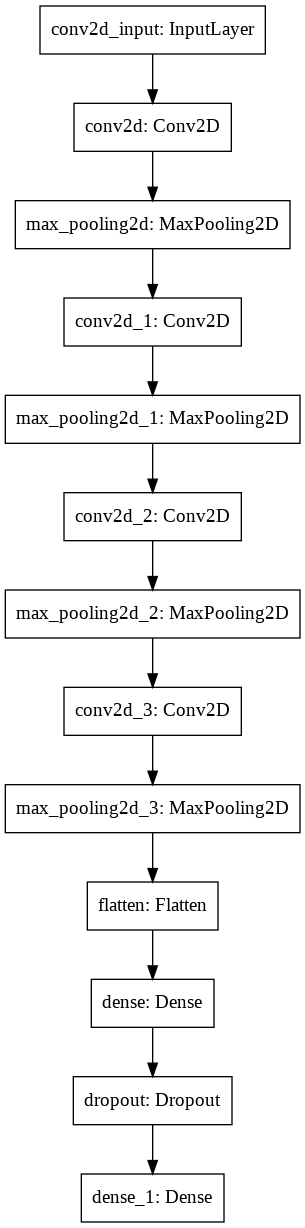

In [ ]:
import pydot
plot_model(classifier)

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 128)       1

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.fit_generator(
        training_set,
        steps_per_epoch=20,
        epochs=50,
        validation_data=test_set,
        validation_steps=100)

In [ ]:
classifier.save('/content/drive/MyDrive/Data sets/Tomato Disease/models/Tomato_model.h5')

In [ ]:
target_dict = dict([(value, key) for key, value in label_map.items()]) 

In [48]:
from tensorflow.keras.preprocessing import image

In [49]:
img=image.load_img('/content/drive/MyDrive/Data sets/Tomato Disease/val/Tomato___Target_Spot/0a51617c-ecb5-42ce-9d34-300307be3465___Com.G_TgS_FL 0976.JPG',target_size=(128,128))

In [51]:
x=image.img_to_array(img)
x

array([[[137., 124., 131.],
        [139., 126., 133.],
        [114., 101., 108.],
        ...,
        [105.,  88.,  94.],
        [119., 102., 108.],
        [124., 107., 113.]],

       [[ 98.,  85.,  92.],
        [157., 144., 151.],
        [166., 153., 160.],
        ...,
        [105.,  88.,  94.],
        [113.,  96., 102.],
        [112.,  95., 101.]],

       [[152., 139., 146.],
        [125., 112., 119.],
        [ 89.,  76.,  83.],
        ...,
        [125., 108., 114.],
        [124., 107., 113.],
        [ 87.,  70.,  76.]],

       ...,

       [[178., 167., 173.],
        [172., 161., 167.],
        [160., 149., 155.],
        ...,
        [143., 130., 137.],
        [138., 125., 132.],
        [145., 132., 139.]],

       [[167., 156., 162.],
        [156., 145., 151.],
        [169., 158., 164.],
        ...,
        [136., 123., 130.],
        [148., 135., 142.],
        [139., 126., 133.]],

       [[171., 160., 166.],
        [165., 154., 160.],
        [171., 1

In [52]:
x.shape

(128, 128, 3)

In [53]:
x=x/255
x.shape

(128, 128, 3)

In [54]:
import numpy as np
x=np.expand_dims(x,axis=0)
x.shape

(1, 128, 128, 3)

In [55]:
pred=classifier.predict(x)
pred

array([[1.9297684e-07, 3.7419961e-03, 2.3598841e-04, 4.0770819e-06,
        2.0221379e-04, 9.4778195e-02, 1.9376311e-01, 1.2313618e-06,
        1.4136899e-06, 7.0727158e-01]], dtype=float32)

In [56]:
ind=np.argmax(pred)
target_dict[ind]

'Tomato___healthy'

In [57]:
def predict_diesease(img):
  x=image.img_to_array(img)
  x=x/255
  x=np.expand_dims(x,axis=0)
  pred=classifier.predict(x)
  ind=np.argmax(pred)
  print("Result : {} category".format(target_dict[ind]))

In [60]:
img=image.load_img('/content/drive/MyDrive/Data sets/Tomato Disease/val/Tomato___healthy/01f98912-9627-4ce0-8f0f-e451b7acbb6c___RS_HL 0509.JPG',target_size=(128,128))

In [61]:
predict_diesease(img)

Result : Tomato___healthy category
